In [1]:
%run IDM_helper_functions.ipynb

In [2]:
from pyddm import Model
from pyddm.models import DriftConstant, DriftLinear, NoiseConstant, BoundConstant, OverlayNonDecision, ICPointSourceCenter
from pyddm.functions import fit_adjust_model, display_model

from pyddm import Fittable, Fitted, Sample
from pyddm.models import LossRobustBIC, LossBIC, LossLikelihood, LossRobustLikelihood,LossSquaredError
from pyddm.functions import fit_adjust_model

In [3]:
import pandas as pd
import os
import pyreadr


In [6]:
data_dir = "/Users/wangjiashun/Desktop/Evans2021/Lerche2017/dataBySubject/sub"
sample_size = 38

In [10]:
df

,resultid,subjectid,age,gender,source,experiment,block,blockorder,requiredaccuracy,maxduration,...,coherence,angle,time,response,correctresponse,iscorrect,startcorrect,startduration,effortbefore,effortafter
0,1017,1006,25,male,Not Set,study2,3,3,0.00,0,...,0.45,135,619,2,2,1,2,4819.352,NaN,NaN
1,1017,1006,25,male,Not Set,study2,3,3,0.00,0,...,0.35,225,496,1,1,1,1,2535.219,NaN,NaN
2,1017,1006,25,male,Not Set,study2,3,3,0.00,0,...,0.40,135,623,2,2,1,3,5453.283,NaN,NaN
3,1017,1006,25,male,Not Set,study2,3,3,0.00,0,...,0.05,225,520,1,1,1,0,2001.580,NaN,NaN
4,1017,1006,25,male,Not Set,study2,3,3,0.00,0,...,0.20,225,-1,-1,1,-1,0,0.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,1464,1043,19,female,Not Set,study2c,3,2,0.77,0,...,0.06,135,1203,2,2,1,22,0.000,6.0,6.0
28516,1464,1043,19,female,Not Set,study2c,3,2,0.77,0,...,0.08,225,1159,1,1,1,28,0.000,6.0,6.0
28517,1464,1043,19,female,Not Set,study2c,3,2,0.77,0,...,0.05,135,1050,2,2,1,20,0.000,6.0,6.0
28518,1464,1043,19,female,Not Set,study2c,3,2,0.77,0,...,0.06,225,1471,1,1,1,6,0.000,6.0,6.0


In [ ]:
par_fitted_A = np.zeros((sample_size,4))

In [14]:
for i in range(38):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".csv")
    df = pd.read_csv(path, sep = ",")
    df = df[df["Cond"]=="Speed"] # A condition
    df = df[df["Time"]<30]
    
    samp = Sample.from_pandas_dataframe(df, rt_column_name="Time", correct_column_name="Correct")

    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftLinear(drift=Fittable(minval=0, maxval=1),
                                    t = 0,
                                    x=Fittable(minval=-5, maxval=5)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=30)
                  #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_A[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_A[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_A[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    par_fitted_A[i,3] = np.array(model_fit.parameters()['drift']['x'])
    
    print(par_fitted_A[i,:])


37


Info: Params [ 0.40388827 -4.90186469  0.78138428  0.10144303] gave 395.26203825786257


[ 0.40388827  0.78138428  0.10144303 -4.90186469]


In [19]:
par_fitted_B = np.zeros((sample_size,4))
for i in range(sample_size):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".csv")
    df = pd.read_csv(path, sep = ",")
    df = df[df["Cond"]=="Accuracy"] # A condition
    df = df[df["Time"]<30]
    
    samp = Sample.from_pandas_dataframe(df, rt_column_name="Time", correct_column_name="Correct")

    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftLinear(drift=Fittable(minval=0, maxval=1),
                                    t = 0,
                                    x=Fittable(minval=-5, maxval=5)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=30)
                  #dx=.001, dt=.001, T_dur=3)
    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_B[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_B[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_B[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    par_fitted_B[i,3] = np.array(model_fit.parameters()['drift']['x'])
    
    print(par_fitted_B[i,:])


0


Info: Params [0.12775551 0.23943522 9.84589055 0.96790502] gave 552.7176997091337


[0.12775551 9.84589055 0.96790502 0.23943522]
1


Info: Params [0.22294815 0.25976775 7.80316716 0.13019239] gave 532.7665589990339


[0.22294815 7.80316716 0.13019239 0.25976775]
2


Info: Params [0.03686928 0.80843165 1.30593068 0.33882794] gave 263.7523353804591


[0.03686928 1.30593068 0.33882794 0.80843165]
3


Info: Params [0.08461274 0.5435449  3.69274418 0.1452249 ] gave 437.7232432835138


[0.08461274 3.69274418 0.1452249  0.5435449 ]
4


Info: Params [0.13480043 0.08571957 3.8113953  0.70820754] gave 601.1882476143749


[0.13480043 3.8113953  0.70820754 0.08571957]
5


Info: Params [0.16458292 0.22535568 9.95610595 0.82224181] gave 554.6380267997123


[0.16458292 9.95610595 0.82224181 0.22535568]
6


Info: Params [0.25442246 0.58938855 3.19635677 0.61869392] gave 400.6712443756643


[0.25442246 3.19635677 0.61869392 0.58938855]
7


Info: Params [0.31207847 0.70251562 3.65902688 0.12711496] gave 380.72793568401505


[0.31207847 3.65902688 0.12711496 0.70251562]
8


Info: Params [ 0.03626431 -4.50346487  0.76622079  0.11757013] gave 390.6786462168907


[ 0.03626431  0.76622079  0.11757013 -4.50346487]
9


Info: Params [ 0.14286308 -2.1086208   1.09545871  0.10141366] gave 488.74846084391976


[ 0.14286308  1.09545871  0.10141366 -2.1086208 ]
10


Info: Params [0.22132161 0.21062906 6.33767355 0.6815225 ] gave 550.0896705797586


[0.22132161 6.33767355 0.6815225  0.21062906]
11


Info: Params [0.09054915 0.12406148 9.96825563 0.87054565] gave 572.3217699488048


[0.09054915 9.96825563 0.87054565 0.12406148]
12


Info: Params [0.28302832 0.5366926  3.37198831 0.49171892] gave 411.46139662683777


[0.28302832 3.37198831 0.49171892 0.5366926 ]
13


Info: Params [0.20688154 0.07114531 3.88796911 0.86561232] gave 574.645768372969


[0.20688154 3.88796911 0.86561232 0.07114531]
14


Info: Params [0.1915529  0.18699401 4.45201607 0.23457119] gave 566.762665906089


[0.1915529  4.45201607 0.23457119 0.18699401]
15


Info: Params [0.10661723 0.15060966 9.55854078 0.11455574] gave 616.9489154786276


[0.10661723 9.55854078 0.11455574 0.15060966]
16


Info: Params [0.25028863 0.84877958 5.79354844 0.19182287] gave 368.25510955280026


[0.25028863 5.79354844 0.19182287 0.84877958]
17


Info: Params [0.14480737 0.11031841 2.05100049 0.11163318] gave 476.1238554549856


[0.14480737 2.05100049 0.11163318 0.11031841]
18


Info: Params [0.12591181 0.44841196 3.55116568 0.30398814] gave 457.8459516942354


[0.12591181 3.55116568 0.30398814 0.44841196]
19


Info: Params [0.25841427 0.12908558 9.87301465 0.99807168] gave 573.2575754456329


[0.25841427 9.87301465 0.99807168 0.12908558]
20


Info: Params [0.16072498 1.27107385 4.58314832 0.27927487] gave 305.6055097559315


[0.16072498 4.58314832 0.27927487 1.27107385]
21


Info: Params [0.03443145 1.91386905 3.42943589 0.10994374] gave 239.3755980565769


[0.03443145 3.42943589 0.10994374 1.91386905]
22


Info: Params [0.17416585 0.27935884 3.56548116 0.33762215] gave 506.34543636520283


[0.17416585 3.56548116 0.33762215 0.27935884]
23


Info: Params [0.17913316 0.22246204 6.0254781  0.19183105] gave 557.9161591984933


[0.17913316 6.0254781  0.19183105 0.22246204]
24


Info: Params [0.04606804 2.00691043 3.59913993 0.12549024] gave 231.25868210613723


[0.04606804 3.59913993 0.12549024 2.00691043]
25


Info: Params [ 0.25216345 -5.          0.93994945  0.10073684] gave 637.079077224129


[ 0.25216345  0.93994945  0.10073684 -5.        ]
26


Info: Params [0.17855665 0.23662301 4.37585956 0.93073313] gave 540.4095496345801


[0.17855665 4.37585956 0.93073313 0.23662301]
27


Info: Params [0.22963789 0.24326179 9.80132729 0.66976572] gave 525.2937856212668


[0.22963789 9.80132729 0.66976572 0.24326179]
28


Info: Params [0.10500309 0.11495336 6.69910678 0.32685807] gave 638.428504968285


[0.10500309 6.69910678 0.32685807 0.11495336]
29


Info: Params [0.20949265 0.6024657  9.78639082 0.9675481 ] gave 407.6889959222233


[0.20949265 9.78639082 0.9675481  0.6024657 ]
30


Info: Params [0.3221788  0.48805718 4.48499295 0.1108152 ] gave 425.4805880903913


[0.3221788  4.48499295 0.1108152  0.48805718]
31


Info: Params [ 0.19734732 -1.30379418  1.53279918  0.29226024] gave 618.4884523026761


[ 0.19734732  1.53279918  0.29226024 -1.30379418]
32


Info: Params [0.45134    0.18728239 1.98927429 0.44216091] gave 383.71062960278766


[0.45134    1.98927429 0.44216091 0.18728239]
33


Info: Params [0.12384739 0.75524518 4.8612951  0.35738866] gave 390.9014790020718


[0.12384739 4.8612951  0.35738866 0.75524518]
34


Info: Params [0.31058726 0.18550926 6.78928214 0.11408851] gave 526.8500719010726


[0.31058726 6.78928214 0.11408851 0.18550926]
35


Info: Params [0.22442287 0.05490524 3.73616397 0.27734407] gave 590.6646836693129


[0.22442287 3.73616397 0.27734407 0.05490524]
36


Info: Params [0.13728846 1.10028811 7.56858373 0.49836904] gave 328.82022747816325


[0.13728846 7.56858373 0.49836904 1.10028811]
37


Info: Params [ 0.22704811 -2.48403487  1.28423654  0.78097017] gave 621.5127064412471


[ 0.22704811  1.28423654  0.78097017 -2.48403487]


In [52]:

df_SAT = pd.read_csv("OUMresultLerche2017.csv")
participant = [i for i in range(1,sample_size+1)]*8
df_SAT["participant"] = participant

df_SAT = df_SAT[["values", "parameter","condition", "participant"]].pivot(index = ["participant", "condition"], columns='parameter')

In [53]:
df0 = pd.DataFrame(np.array(df_SAT["values"]), 
                   columns = ['Boundary Separation','Drift Rate',"Effective Inhibition",'Non-decision Time'])

In [54]:
df0["SAT"] = ["Accuracy", "Speed"]*sample_size
df_SAT = df0


In [58]:
df_SAT.to_csv("OUMresultLerche2017.csv")

In [55]:
S = np.array(df_SAT.loc[(df_SAT['SAT'] == "Speed")][["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"]])
A = np.array(df_SAT.loc[(df_SAT['SAT'] == "Accuracy")][["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"]])
dif = S-A
df_dif = pd.DataFrame(dif,columns = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"])

In [56]:
df_SAT_melted = pd.melt(df_SAT, id_vars = ["SAT"], value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time', "Effective Inhibition"],
                       var_name = "Parameter", value_name = "Value")
df_dif_melted = pd.melt(df_dif, value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time', "Effective Inhibition"],
                       var_name = "Parameter", value_name = "Difference")

In [60]:
df_dif_melted.to_csv("OUMdifResultLerche2017.csv") 

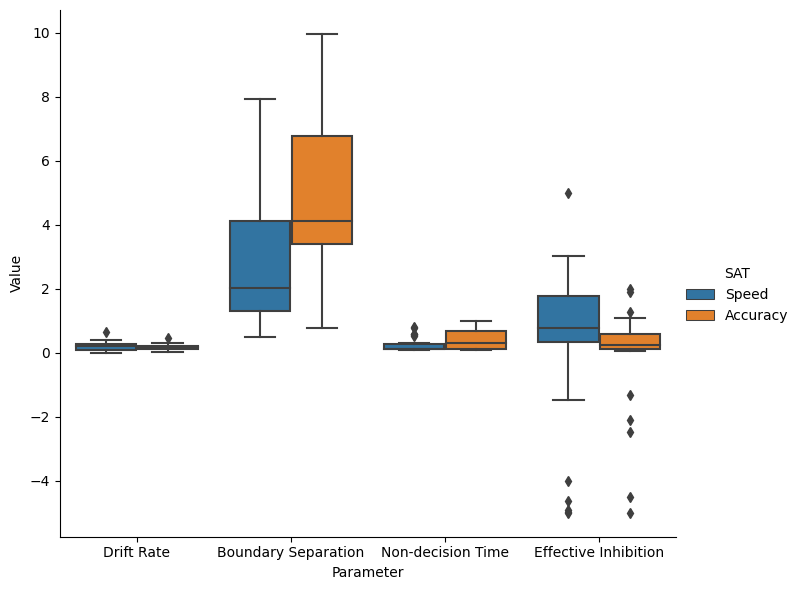

In [57]:
sns.catplot(data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", kind="box",
            height=6, aspect=7/6, hue_order = ["Speed", "Accuracy"])

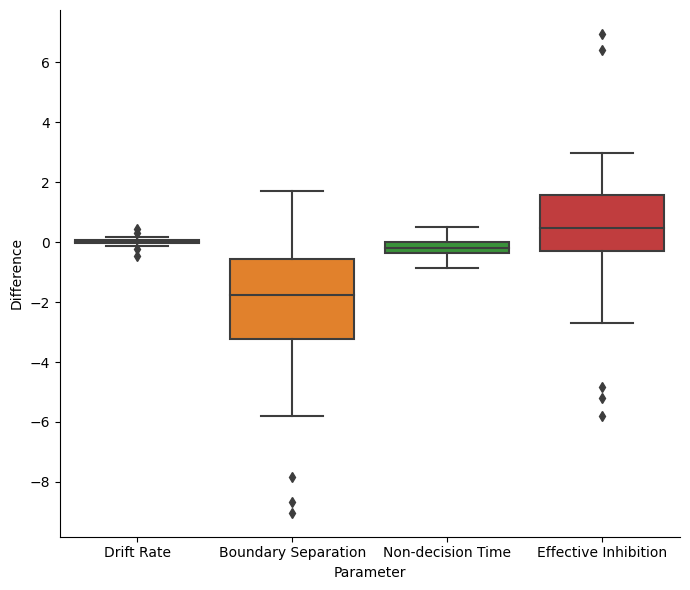

In [59]:
sns.catplot(data=df_dif_melted, x="Parameter", y="Difference", kind="box",
            height=6, aspect=7/6)

In [18]:
import scipy

In [19]:
scipy.stats.ttest_rel(par_fitted_A[:,0], par_fitted_B[:,0])

Ttest_relResult(statistic=2.954476655896003, pvalue=0.008141075695752857)

In [20]:
scipy.stats.ttest_rel(par_fitted_A[:,1], par_fitted_B[:,1])

Ttest_relResult(statistic=1.3666829806693381, pvalue=0.18768050875769932)

### fit with DDM

In [27]:
par_fitted_A = np.zeros((sample_size,3))
for i in range(38):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".csv")
    df = pd.read_csv(path, sep = ",")
    df = df[df["Cond"]=="Speed"] # A condition
    df = df[df["Time"]<30]
    
    samp = Sample.from_pandas_dataframe(df, rt_column_name="Time", correct_column_name="Correct")

    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=0, maxval=1)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=30)
                  #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_A[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_A[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_A[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    
    print(par_fitted_A[i,:])


0


Info: Params [0.27715296 1.3233657  0.76522846] gave 336.8523766842395


[0.27715296 1.3233657  0.76522846]
1


Info: Params [0.33861653 2.47858397 0.99175419] gave 472.2025291478348


[0.33861653 2.47858397 0.99175419]
2


Info: Params [0.         0.85626015 0.1005132 ] gave 207.99562702237534


[0.         0.85626015 0.1005132 ]
3


Info: Params [0.1023901  1.40870021 0.1001032 ] gave 390.1810860912096


[0.1023901  1.40870021 0.1001032 ]
4


Info: Params [0.16969044 2.62120826 0.74836244] gave 558.6883007713136


[0.16969044 2.62120826 0.74836244]
5


Info: Params [0.22295224 1.07105168 0.79087418] gave 268.8820231395514


[0.22295224 1.07105168 0.79087418]
6


Info: Params [0.19525144 0.77778393 0.36342377] gave 177.29922812057993


[0.19525144 0.77778393 0.36342377]
7


Info: Params [0.23801107 0.74949687 0.67750764] gave 162.7634510409062


[0.23801107 0.74949687 0.67750764]
8


Info: Params [0.         0.83620007 0.15013504] gave 203.61469035572404


[0.         0.83620007 0.15013504]
9


Info: Params [0.         1.56603825 0.10188296] gave 442.3493070164141


[0.         1.56603825 0.10188296]
10


Info: Params [0.67008912 1.09117036 0.98122442] gave 222.58397791071002


[0.67008912 1.09117036 0.98122442]
11


Info: Params [0.         0.7513594  0.37072725] gave 158.81295479097344


[0.         0.7513594  0.37072725]
12


Info: Params [0.30468418 1.03569726 0.76081263] gave 258.2803368293658


[0.30468418 1.03569726 0.76081263]
13


Info: Params [0.21262404 1.56610892 0.81649302] gave 380.57688544596743


[0.21262404 1.56610892 0.81649302]
14


Info: Params [0.10283735 1.22626365 0.10207122] gave 329.9549687367523


[0.10283735 1.22626365 0.10207122]
15


Info: Params [0.02580698 1.00666601 0.71866278] gave 256.7594504017985


[0.02580698 1.00666601 0.71866278]
16


Info: Params [0.26218393 1.43129952 0.13412207] gave 357.3225026038969


[0.26218393 1.43129952 0.13412207]
17


Info: Params [0.25975829 0.92934282 0.21391021] gave 220.58214423162184


[0.25975829 0.92934282 0.21391021]
18


Info: Params [0.21863712 1.42571446 0.94260562] gave 365.31059264528085


[0.21863712 1.42571446 0.94260562]
19


Info: Params [0.2402931 1.2266744 0.651852 ] gave 309.7491194278297


[0.2402931 1.2266744 0.651852 ]
20


Info: Params [0.24484846 1.54924488 0.23235423] gave 380.58278753511354


[0.24484846 1.54924488 0.23235423]
21


Info: Params [0.         0.97043766 0.30490875] gave 253.65511241773527


[0.         0.97043766 0.30490875]
22


Info: Params [0.23164095 0.77944196 0.3044187 ] gave 174.20399254712328


[0.23164095 0.77944196 0.3044187 ]
23


Info: Params [0.19469964 2.63442915 0.95317406] gave 522.1739353056603


[0.19469964 2.63442915 0.95317406]
24


Info: Params [0.37872489 0.62089825 0.3852395 ] gave 94.69974381651973


[0.37872489 0.62089825 0.3852395 ]
25


Info: Params [0.29819218 0.84680613 0.4412281 ] gave 204.2350433379114


[0.29819218 0.84680613 0.4412281 ]
26


Info: Params [0.2344798  1.38609828 0.42173258] gave 345.7921893457048


[0.2344798  1.38609828 0.42173258]
27


Info: Params [0.16221724 1.29046783 0.10006219] gave 452.48085342828796


[0.16221724 1.29046783 0.10006219]
28


Info: Params [0.12211627 1.95860903 0.99153767] gave 463.9175509934768


[0.12211627 1.95860903 0.99153767]
29


Info: Params [0.19308117 2.79799419 0.99349412] gave 529.6892474965241


[0.19308117 2.79799419 0.99349412]
30


Info: Params [0.13219876 0.75232679 0.11475778] gave 172.34034931106305


[0.13219876 0.75232679 0.11475778]
31


Info: Params [0.18296503 1.26265884 0.10090394] gave 400.2003690578479


[0.18296503 1.26265884 0.10090394]
32


Info: Params [0.         0.63301782 0.10684345] gave 126.00428123065569


[0.         0.63301782 0.10684345]
33


Info: Params [0.04606019 1.10940599 0.14206843] gave 293.6837963443947


[0.04606019 1.10940599 0.14206843]
34


Info: Params [0.26841741 1.48364161 0.7995572 ] gave 370.9803837844914


[0.26841741 1.48364161 0.7995572 ]
35


Info: Params [0.38440278 2.50197812 0.37372883] gave 475.13598555603465


[0.38440278 2.50197812 0.37372883]
36


Info: Params [0.18904089 1.5492761  0.99293889] gave 386.74118250602965


[0.18904089 1.5492761  0.99293889]
37


Info: Params [0.27347563 1.30324538 0.10075635] gave 442.98284644473455


[0.27347563 1.30324538 0.10075635]


In [28]:
par_fitted_B = np.zeros((sample_size,3))
for i in range(sample_size):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".csv")
    df = pd.read_csv(path, sep = ",")
    df = df[df["Cond"]=="Accuracy"] # A condition
    df = df[df["Time"]<30]
    
    samp = Sample.from_pandas_dataframe(df, rt_column_name="Time", correct_column_name="Correct")

    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=0, maxval=1)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=30)
                  #dx=.001, dt=.001, T_dur=3)
    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_B[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_B[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_B[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    
    print(par_fitted_B[i,:])


0


Info: Params [0.09424904 3.51216052 0.99096057] gave 623.3880250590573


[0.09424904 3.51216052 0.99096057]
1


Info: Params [0.20274004 3.11400604 0.98272614] gave 561.7228189751231


[0.20274004 3.11400604 0.98272614]
2


Info: Params [0.03855837 1.05234777 0.39081916] gave 260.0231735771655


[0.03855837 1.05234777 0.39081916]
3


Info: Params [0.10144859 1.78104628 0.6780494 ] gave 443.7821432679989


[0.10144859 1.78104628 0.6780494 ]
4


Info: Params [0.13348194 3.17344291 0.99313717] gave 597.3525372383009


[0.13348194 3.17344291 0.99313717]
5


Info: Params [0.1483139  3.64729909 0.98535976] gave 616.5973824793676


[0.1483139  3.64729909 0.98535976]
6


Info: Params [0.25937618 1.71643861 0.9996837 ] gave 403.5817858555142


[0.25937618 1.71643861 0.9996837 ]
7


Info: Params [0.25233401 1.59797227 0.6170513 ] gave 392.68337769106216


[0.25233401 1.59797227 0.6170513 ]
8


Info: Params [0.01578159 1.2062666  0.10090708] gave 419.30411957732366


[0.01578159 1.2062666  0.10090708]
9


Info: Params [0.11543624 1.83289957 0.10189934] gave 487.0412407099102


[0.11543624 1.83289957 0.10189934]
10


Info: Params [0.22645137 3.34550908 0.99058849] gave 571.0267244242066


[0.22645137 3.34550908 0.99058849]
11


Info: Params [0.09585041 4.60206624 0.89300844] gave 611.5789896576205


[0.09585041 4.60206624 0.89300844]
12


Info: Params [0.26591506 1.76400237 0.99538606] gave 413.47446721874286


[0.26591506 1.76400237 0.99538606]
13


Info: Params [0.21038999 3.39174289 0.94390206] gave 571.6919259619286


[0.21038999 3.39174289 0.94390206]
14


Info: Params [0.18610321 2.85870221 0.86993324] gave 565.1850842290781


[0.18610321 2.85870221 0.86993324]
15


Info: Params [0.11038404 4.09654789 0.97139577] gave 645.732846443616


[0.11038404 4.09654789 0.97139577]
16


Info: Params [0.20761948 1.58828069 0.99176436] gave 386.28529369688755


[0.20761948 1.58828069 0.99176436]
17


Info: Params [0.1451767  1.92213952 0.10841881] gave 471.93559940328856


[0.1451767  1.92213952 0.10841881]
18


Info: Params [0.12371635 1.86186193 0.93887544] gave 459.87821687891795


[0.12371635 1.86186193 0.93887544]
19


Info: Params [0.25881239 4.98061195 0.98688917] gave 617.2337142056156


[0.25881239 4.98061195 0.98688917]
20


Info: Params [0.149075   1.23040081 0.89684944] gave 318.3648937472392


[0.149075   1.23040081 0.89684944]
21


Info: Params [0.         0.93425446 0.55650298] gave 244.82825693932375


[0.         0.93425446 0.55650298]
22


Info: Params [0.19008031 2.19552269 0.98311218] gave 503.16850167062825


[0.19008031 2.19552269 0.98311218]
23


Info: Params [0.17469323 3.05101237 0.90342731] gave 574.3488297063902


[0.17469323 3.05101237 0.90342731]
24


Info: Params [0.13651539 0.93734213 0.5713526 ] gave 236.1200004372556


[0.13651539 0.93734213 0.5713526 ]
25


Info: Params [0.07745261 1.62676552 0.10070013] gave 1097.690417423965


[0.07745261 1.62676552 0.10070013]
26


Info: Params [0.18869727 2.82289045 0.99867688] gave 547.563661368086


[0.18869727 2.82289045 0.99867688]
27


Info: Params [0.22337311 3.62638097 0.95878757] gave 581.5252034827921


[0.22337311 3.62638097 0.95878757]
28


Info: Params [0.11134767 3.99692982 0.82615737] gave 646.176513015879


[0.11134767 3.99692982 0.82615737]
29


Info: Params [0.20457342 2.50102519 0.97386688] gave 492.7599645570974


[0.20457342 2.50102519 0.97386688]
30


Info: Params [0.29129061 1.9741785  0.78041677] gave 438.01435222831583


[0.29129061 1.9741785  0.78041677]
31


Info: Params [0.14676485 2.97081193 0.1012757 ] gave 614.0207343208008


[0.14676485 2.97081193 0.1012757 ]
32


Info: Params [0.45766817 1.76613296 0.49967686] gave 379.268555003343


[0.45766817 1.76613296 0.49967686]
33


Info: Params [0.09792797 1.69629955 0.9879937 ] gave 407.0779248243274


[0.09792797 1.69629955 0.9879937 ]
34


Info: Params [0.32233564 3.51735882 0.9467968 ] gave 542.096723019996


[0.32233564 3.51735882 0.9467968 ]
35


Info: Params [0.22748328 3.29180546 0.59551423] gave 587.0961710638218


[0.22748328 3.29180546 0.59551423]
36


Info: Params [0.10690787 1.62785945 0.9994573 ] gave 382.6254517917067


[0.10690787 1.62785945 0.9994573 ]
37


Info: Params [0.13006683 3.41163002 0.13160115] gave 620.2886577828915


[0.13006683 3.41163002 0.13160115]


In [47]:
my_array = np.concatenate((par_fitted_A, par_fitted_B), axis = 0)
df_SAT = pd.DataFrame(my_array, columns = ['Drift Rate','Boundary Separation','Non-decision Time'])
df_SAT["SAT"] = ["Speed"]*sample_size + ["Accuracy"]*sample_size

df_SAT.to_csv("DDMresultLerche2017.csv")

In [61]:
df_SAT = pd.read_csv(('DDMresultLerche2017.csv'))

In [62]:
S = np.array(df_SAT.loc[(df_SAT['SAT'] == "Speed")][["Drift Rate", "Boundary Separation", "Non-decision Time"]])
A = np.array(df_SAT.loc[(df_SAT['SAT'] == "Accuracy")][["Drift Rate", "Boundary Separation", "Non-decision Time"]])
dif = S-A
df_dif = pd.DataFrame(dif,columns = ["Drift Rate", "Boundary Separation", "Non-decision Time"])

In [63]:
df_SAT_melted = pd.melt(df_SAT, id_vars = ["SAT"], value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time'],
                       var_name = "Parameter", value_name = "Value")
df_dif_melted = pd.melt(df_dif, value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time'],
                       var_name = "Parameter", value_name = "Difference")

In [64]:
df_dif_melted.to_csv("DDMdifResultLerche2017.csv") 


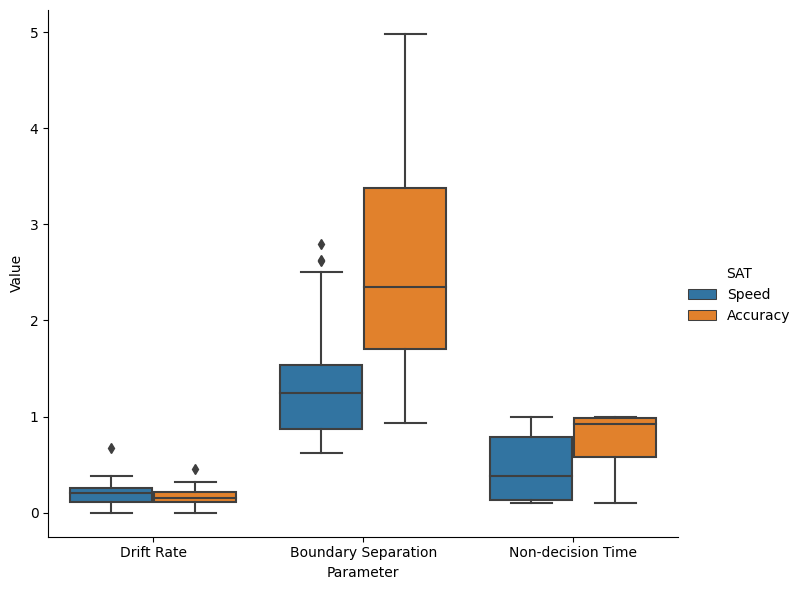

In [50]:
sns.catplot(data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", kind="box",
            height=6, aspect=7/6)

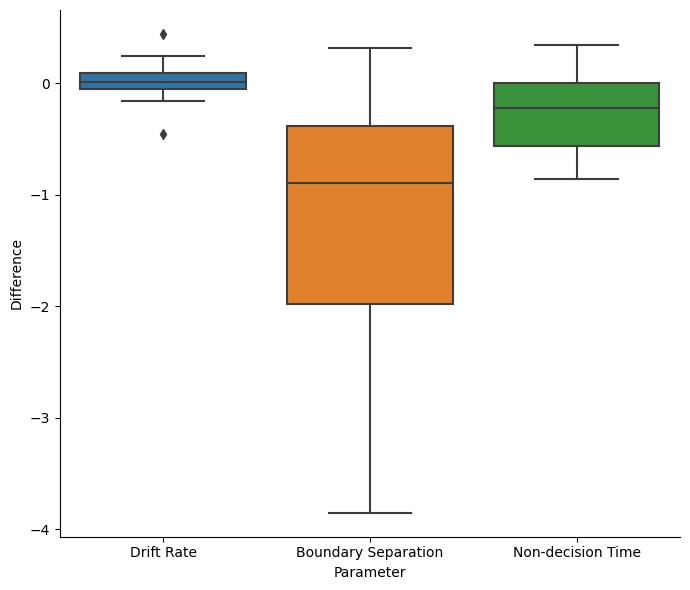

In [51]:
sns.catplot(data=df_dif_melted, x="Parameter", y="Difference", kind="box",
            height=6, aspect=7/6)

In [ ]:
df_SAT.to_csv("DDMresultLerche2017.csv")

## DDM-OUM: use Dutilh 2018 DDM parameters - let inhibition and boundary vary

In [22]:
df_Dutilh2018 = pd.read_csv('DDMresultDutilh.csv')
df_Dutilh2018

,Unnamed: 0,Drift Rate,Boundary Separation,Non-decision Time,SAT
0,0,4.886592,1.173918,0.343236,1
1,1,5.255924,1.083176,0.340134,1
2,2,4.993867,1.047623,0.257719,1
3,3,1.769413,0.899000,0.264103,1
4,4,2.576097,0.602602,0.227779,1
5,5,2.445525,0.910601,0.251856,1
6,6,3.639097,1.175035,0.244861,1
7,7,3.017418,1.208609,0.202474,1
8,8,2.906562,0.939030,0.225931,1
9,9,1.132213,0.718812,0.209710,1


In [30]:
#data_dir = "/Users/wangjiashun/Desktop/SAT-Rafiei/data/data_sub"
df_all = pd.DataFrame(columns = ['Participant', 'v','a','ter','k','SAT'],)

for Participant in range(40):

    print(Participant)

    model = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift=df_Dutilh2018["Drift Rate"][Participant]),   
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B = df_Dutilh2018["Boundary Separation"][Participant]),
                  overlay=OverlayNonDecision(nondectime = df_Dutilh2018["Non-decision Time"][Participant]),
                  dx=.001, dt=.001, T_dur=3)

    sol = model.solve()
    samp = sol.resample(1000)


    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftLinear(drift=Fittable(minval=0, maxval=6),
                                    t = 0,
                                    x=Fittable(minval=-10, maxval=15)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=8)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    df_sub = pd.DataFrame(columns = ['Frequency', 'SAT', 'Participant', 'v','a','ter','k'],)

    df_sub = pd.DataFrame({
                           'SAT':df_Dutilh2018["SAT"][Participant], 
                           'participant': Participant + 1,
                           'Drift Rate': np.array(model_fit.parameters()['drift']['drift']), 
                           'Boundary Separation': np.array(model_fit.parameters()['bound']['B']),
                           'Non-decision Time': np.array(model_fit.parameters()['overlay']['nondectime']),
                           'Effective Inhibition': np.array(model_fit.parameters()['drift']['x'])
                          }, index=[i])

    df_all = df_all.append(df_sub)

    print(df_sub)


0


Info: Params [4.64144202 0.27949574 1.10421328 0.35710912] gave -1938.9813279025893


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1            1    4.641442             1.104213           0.357109   

   Effective Inhibition  
2              0.279496  
1


Info: Params [4.8125522  4.36289306 4.46552285 0.15832253] gave -2307.8627146930808


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1            2    4.812552             4.465523           0.158323   

   Effective Inhibition  
2              4.362893  
2


Info: Params [4.22611554 3.56699522 1.36413885 0.23979738] gave -2088.048271049306


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1            3    4.226116             1.364139           0.239797   

   Effective Inhibition  
2              3.566995  
3


Info: Params [ 1.81476423 -2.68288025  0.6939418   0.29282955] gave 506.08757798483526


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1            4    1.814764             0.693942            0.29283   

   Effective Inhibition  
2              -2.68288  
4


Info: Params [ 2.61602706 -0.94794394  0.57561981  0.23156235] gave -1094.16335219224


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1            5    2.616027              0.57562           0.231562   

   Effective Inhibition  
2             -0.947944  
5


Info: Params [ 2.89273287 -3.04363152  0.76186623  0.27096958] gave -444.5870611207619


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1            6    2.892733             0.761866            0.27097   

   Effective Inhibition  
2             -3.043632  
6


Info: Params [ 4.40618295 -2.04148437  1.07827869  0.25552757] gave -1175.9623474184618


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1            7    4.406183             1.078279           0.255528   

   Effective Inhibition  
2             -2.041484  
7


Info: Params [2.88460471 0.25770818 1.14295313 0.21621349] gave -642.5732414606322


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1            8    2.884605             1.142953           0.216213   

   Effective Inhibition  
2              0.257708  
8


Info: Params [2.81852404 0.29027889 0.91364091 0.233302  ] gave -840.8658145368277


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1            9    2.818524             0.913641           0.233302   

   Effective Inhibition  
2              0.290279  
9


Info: Params [ 1.13807747 -0.87752492  0.67385838  0.21654848] gave 962.0882766193872


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           10    1.138077             0.673858           0.216548   

   Effective Inhibition  
2             -0.877525  
10


Info: Params [ 3.08551396 -1.63941983  0.95910697  0.23680589] gave -486.3926719410282


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           11    3.085514             0.959107           0.236806   

   Effective Inhibition  
2              -1.63942  
11


Info: Params [1.53344037 0.40416463 1.09840325 0.22119222] gave 940.1935852638111


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           12     1.53344             1.098403           0.221192   

   Effective Inhibition  
2              0.404165  
12


Info: Params [1.9655926  0.3731387  0.87904171 0.20528304] gave 20.770366114277806


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           13    1.965593             0.879042           0.205283   

   Effective Inhibition  
2              0.373139  
13


Info: Params [2.54436007 1.09137292 0.98838324 0.30825064] gave -772.4807271688085


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           14     2.54436             0.988383           0.308251   

   Effective Inhibition  
2              1.091373  
14


Info: Params [3.55634788 0.05760739 1.44425017 0.19294063] gave -844.1124098725942


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           15    3.556348              1.44425           0.192941   

   Effective Inhibition  
2              0.057607  
15


Info: Params [3.91140515 0.064528   1.00922564 0.30586078] gave -1517.78214923517


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           16    3.911405             1.009226           0.305861   

   Effective Inhibition  
2              0.064528  
16


Info: Params [ 3.27653076 -0.66237224  0.52119677  0.29420014] gave -1852.9136029579854


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           17    3.276531             0.521197             0.2942   

   Effective Inhibition  
2             -0.662372  
17


Info: Params [ 2.19211235 -0.69636499  0.90373542  0.39572062] gave 53.459087007976734


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           18    2.192112             0.903735           0.395721   

   Effective Inhibition  
2             -0.696365  
18


Info: Params [5.22559329 1.72951277 1.71243393 0.21292389] gave -2205.995302282408


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           19    5.225593             1.712434           0.212924   

   Effective Inhibition  
2              1.729513  
19


Info: Params [ 5.32696563 -3.36972117  1.20431404  0.24416914] gave -947.6187940395554


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    1           20    5.326966             1.204314           0.244169   

   Effective Inhibition  
2             -3.369721  
20


Info: Params [ 2.83512364 -1.21940787  1.04569372  0.36889407] gave -214.4337682257472


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           21    2.835124             1.045694           0.368894   

   Effective Inhibition  
2             -1.219408  
21


Info: Params [ 2.21257395 -1.11724634  1.04857933  0.44633449] gave 452.9949192438303


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           22    2.212574             1.048579           0.446334   

   Effective Inhibition  
2             -1.117246  
22


Info: Params [ 5.96745989 -4.72651435  1.38203665  0.289911  ] gave 71.0427814518789


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           23     5.96746             1.382037           0.289911   

   Effective Inhibition  
2             -4.726514  
23


Info: Params [1.27083224 0.30242089 1.29784348 0.31687683] gave 1591.150759153586


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           24    1.270832             1.297843           0.316877   

   Effective Inhibition  
2              0.302421  
24


Info: Params [3.75141001 0.64347099 1.58898205 0.29448506] gave -1098.6941450409959


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           25     3.75141             1.588982           0.294485   

   Effective Inhibition  
2              0.643471  
25


Info: Params [1.16042596 1.78135353 0.87565934 0.32475759] gave 845.1405555913782


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           26    1.160426             0.875659           0.324758   

   Effective Inhibition  
2              1.781354  
26


Info: Params [2.4212787  0.86233536 1.34915642 0.24121258] gave -228.88230602459095


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           27    2.421279             1.349156           0.241213   

   Effective Inhibition  
2              0.862335  
27


Info: Params [ 2.86560874 -0.34618612  2.05854769  0.23852319] gave 504.06733369716545


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           28    2.865609             2.058548           0.238523   

   Effective Inhibition  
2             -0.346186  
28


Info: Params [2.12959875 0.20328411 1.43871231 0.30460853] gave 456.0229940768943


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           29    2.129599             1.438712           0.304609   

   Effective Inhibition  
2              0.203284  
29


Info: Params [1.73802843 0.02215357 1.43046608 0.21067666] gave 1073.4230417396684


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           30    1.738028             1.430466           0.210677   

   Effective Inhibition  
2              0.022154  
30


Info: Params [1.97425069 0.18278411 1.26525487 0.24040623] gave 514.7298521837149


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           31    1.974251             1.265255           0.240406   

   Effective Inhibition  
2              0.182784  
31


Info: Params [1.80850732 0.1025909  1.4554723  0.48908035] gave 967.3420197617969


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           32    1.808507             1.455472            0.48908   

   Effective Inhibition  
2              0.102591  
32


Info: Params [ 1.86504603 -1.37344615  0.80359163  0.34252151] gave 450.82452215377384


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           33    1.865046             0.803592           0.342522   

   Effective Inhibition  
2             -1.373446  
33


Info: Params [ 3.29118766 -2.31277874  1.12614689  0.58687779] gave 27.52244653792395


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           34    3.291188             1.126147           0.586878   

   Effective Inhibition  
2             -2.312779  
34


Info: Params [ 3.43730295 -1.32496527  1.20369062  0.31209483] gave -433.0149911428832


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           35    3.437303             1.203691           0.312095   

   Effective Inhibition  
2             -1.324965  
35


Info: Params [ 2.36199217 -0.41921896  0.73395201  0.38760891] gave -525.2046250899159


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           36    2.361992             0.733952           0.387609   

   Effective Inhibition  
2             -0.419219  
36


Info: Params [3.46009238 0.28329579 1.36822675 0.33425007] gave -916.9565621353316


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           37    3.460092             1.368227            0.33425   

   Effective Inhibition  
2              0.283296  
37


Info: Params [1.33644793 0.24806959 1.82374515 0.4487866 ] gave 1647.2933142017682


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           38    1.336448             1.823745           0.448787   

   Effective Inhibition  
2               0.24807  
38


Info: Params [ 3.27288863 -0.63652256  1.30848165  0.38745113] gave -446.851646701654


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           39    3.272889             1.308482           0.387451   

   Effective Inhibition  
2             -0.636523  
39


Info: Params [2.11134108 0.20471604 1.48266072 0.32788111] gave 519.3495282954743


   SAT  participant  Drift Rate  Boundary Separation  Non-decision Time  \
2    2           40    2.111341             1.482661           0.327881   

   Effective Inhibition  
2              0.204716  


In [ ]:
df_SAT = pd.melt(df_all, 
                 id_vars=['participant', 'SAT'], 
                 value_vars=['Drift Rate','Boundary Separation','Non-decision Time','Effective Inhibition'])

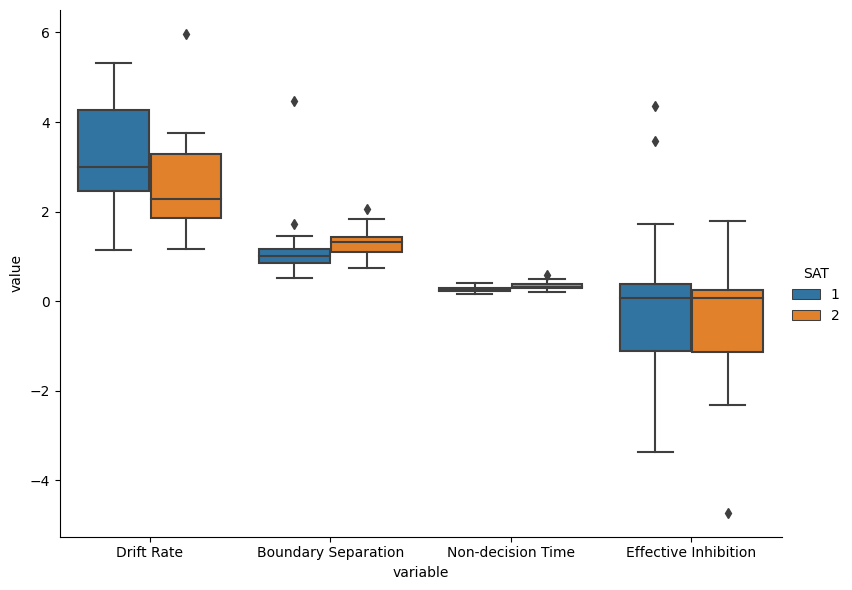

In [33]:
sns.catplot(data=df_SAT, x="variable", y="value", hue="SAT", kind="box",
            height=6, aspect=8/6)

In [36]:
import scipy
scipy.stats.ttest_rel(df_SAT[:20]['value'], df_SAT[20:40]['value'])

Ttest_relResult(statistic=2.328944732969312, pvalue=0.03105070524050918)

In [38]:
scipy.stats.ttest_rel(df_SAT[40:60]['value'], df_SAT[60:80]['value'])

Ttest_relResult(statistic=-0.6185541416934783, pvalue=0.5435552020330445)

In [39]:
scipy.stats.ttest_rel(df_SAT[80:100]['value'], df_SAT[100:120]['value'])

Ttest_relResult(statistic=-4.29945450775912, pvalue=0.00038685827758349055)

In [40]:
scipy.stats.ttest_rel(df_SAT[120:140]['value'], df_SAT[140:160]['value'])

Ttest_relResult(statistic=0.3700632381703128, pvalue=0.7154283242987596)